In [1]:
import pandas as pd

In [2]:
df = pd.read_parquet('/Users/raghulgopal/Desktop/MLOPs Dev/data/green_tripdata_2025-08.parquet')
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,cbd_congestion_fee
0,2,2025-08-01 00:33:57,2025-08-01 00:58:10,N,1.0,70,82,1.0,2.44,21.9,...,0.5,0.00,0.0,NaN,1.0,24.40,2.0,1.0,0.00,0.0
1,2,2025-08-01 00:01:00,2025-08-01 00:12:58,N,1.0,130,216,1.0,4.06,18.4,...,0.5,0.00,0.0,NaN,1.0,20.90,2.0,1.0,0.00,0.0
2,2,2025-08-01 00:11:02,2025-08-01 00:16:06,N,1.0,74,263,1.0,2.09,10.0,...,0.5,3.05,0.0,NaN,1.0,18.30,1.0,1.0,2.75,0.0
3,2,2025-08-01 00:44:09,2025-08-01 00:47:04,N,1.0,42,41,1.0,0.53,5.1,...,0.5,0.00,0.0,NaN,1.0,7.60,2.0,1.0,0.00,0.0
4,2,2025-08-01 00:57:06,2025-08-01 01:05:32,N,1.0,75,239,1.0,2.28,12.1,...,0.5,3.47,0.0,NaN,1.0,20.82,1.0,1.0,2.75,0.0


In [3]:
df['duration'] = df['lpep_dropoff_datetime'] - df['lpep_pickup_datetime']
df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

In [4]:
df['speed'] = df['trip_distance'] / (df['duration'] / 60)  # duration is in minutes, convert to hours

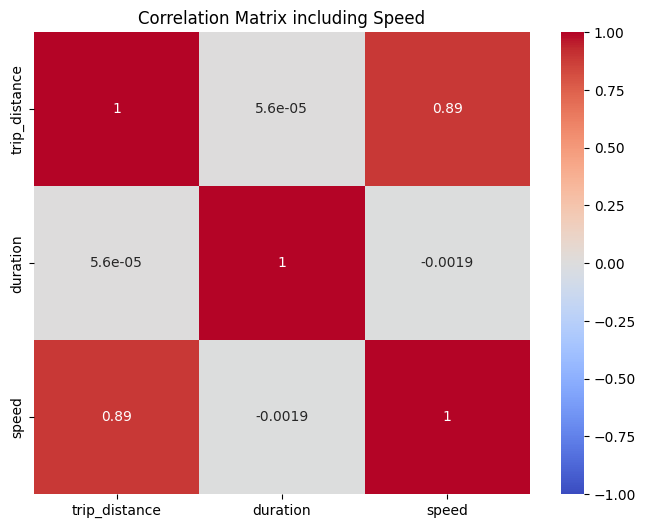

In [5]:
# Correlation between trip distance, trip duration and speed
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = df[['trip_distance', 'duration']].copy()
correlation_matrix['speed'] = df['speed']
correlation_matrix = correlation_matrix.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix including Speed')
plt.show()

In [6]:
# Seems like distance is the most important feature for predicting speed, but will take both distance and duration as features for the model
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
#Install xgboost, and lightgbm using pip install xgboost
%pip install xgboost
%pip install lightgbm
import xgboost as xgb
import lightgbm as lgb

You should consider upgrading via the '/Users/raghulgopal/Desktop/MLOPs Dev/.venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/Users/raghulgopal/Desktop/MLOPs Dev/.venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [7]:
df = df[(df.duration >= 1) & (df.duration <= 60)] # Make sure that duration is between 1 and 60 minutes
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,cbd_congestion_fee,duration,speed
0,2,2025-08-01 00:33:57,2025-08-01 00:58:10,N,1.0,70,82,1.0,2.44,21.90,...,0.0,NaN,1.0,24.40,2.0,1.0,0.00,0.00,24.216667,6.045423
1,2,2025-08-01 00:01:00,2025-08-01 00:12:58,N,1.0,130,216,1.0,4.06,18.40,...,0.0,NaN,1.0,20.90,2.0,1.0,0.00,0.00,11.966667,20.356546
2,2,2025-08-01 00:11:02,2025-08-01 00:16:06,N,1.0,74,263,1.0,2.09,10.00,...,0.0,NaN,1.0,18.30,1.0,1.0,2.75,0.00,5.066667,24.750000
3,2,2025-08-01 00:44:09,2025-08-01 00:47:04,N,1.0,42,41,1.0,0.53,5.10,...,0.0,NaN,1.0,7.60,2.0,1.0,0.00,0.00,2.916667,10.902857
4,2,2025-08-01 00:57:06,2025-08-01 01:05:32,N,1.0,75,239,1.0,2.28,12.10,...,0.0,NaN,1.0,20.82,1.0,1.0,2.75,0.00,8.433333,16.221344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46301,2,2025-08-31 22:56:00,2025-08-31 23:16:00,None,NaN,49,224,NaN,4.12,23.06,...,0.0,NaN,1.0,32.27,NaN,NaN,NaN,0.75,20.000000,12.360000
46302,6,2025-08-31 22:32:06,2025-08-31 22:51:08,None,NaN,70,95,NaN,3.89,2.90,...,0.0,NaN,0.3,16.00,NaN,NaN,NaN,0.00,19.033333,12.262697
46303,2,2025-08-31 22:39:31,2025-08-31 23:00:00,None,NaN,112,224,NaN,4.89,24.63,...,0.0,NaN,1.0,33.19,NaN,NaN,NaN,0.75,20.483333,14.323841
46304,2,2025-08-31 23:43:00,2025-09-01 00:03:00,None,NaN,74,32,NaN,8.37,28.81,...,0.0,NaN,1.0,30.31,NaN,NaN,NaN,0.00,20.000000,25.110000


In [8]:
numerical = ['trip_distance', 'duration']
train_dicts = df[numerical].to_dict(orient='records')
train_dicts

[{'trip_distance': 2.44, 'duration': 24.216666666666665},
 {'trip_distance': 4.06, 'duration': 11.966666666666667},
 {'trip_distance': 2.09, 'duration': 5.066666666666666},
 {'trip_distance': 0.53, 'duration': 2.9166666666666665},
 {'trip_distance': 2.28, 'duration': 8.433333333333334},
 {'trip_distance': 1.61, 'duration': 11.983333333333333},
 {'trip_distance': 3.15, 'duration': 11.516666666666667},
 {'trip_distance': 1.14, 'duration': 5.95},
 {'trip_distance': 2.91, 'duration': 16.1},
 {'trip_distance': 0.0, 'duration': 1.7333333333333334},
 {'trip_distance': 0.54, 'duration': 3.6333333333333333},
 {'trip_distance': 14.67, 'duration': 29.033333333333335},
 {'trip_distance': 1.74, 'duration': 6.6},
 {'trip_distance': 3.14, 'duration': 15.2},
 {'trip_distance': 0.87, 'duration': 5.816666666666666},
 {'trip_distance': 10.03, 'duration': 22.533333333333335},
 {'trip_distance': 4.01, 'duration': 12.433333333333334},
 {'trip_distance': 1.57, 'duration': 8.15},
 {'trip_distance': 3.14, 'dur

In [9]:
# Initialize the DictVectorizer to convert the dictionary to feature matrix
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)
X_train.shape

(43692, 2)

In [10]:
target = 'speed'
y_train = df[target].values

In [11]:
models_to_train = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0), #alpha is the regularization parameter - constant the multiples the L2 norm
    "Lasso": Lasso(alpha=0.1), #alpha is the regularization parameter - constant the multiples the L1 norm
    "ElasticNet": ElasticNet(), #alpha is the regularization parameter - constant the multiples the penalty terms.
    "RandomForestRegressor": RandomForestRegressor(),
    "XGBRegressor": xgb.XGBRegressor(objective='reg:squarederror',
                                     learning_rate=0.1),
    "LGBMRegressor": lgb.LGBMRegressor(learning_rate=0.1,
                                       objective='regression',
                                       boosting_type='gbdt') #default is gbdt
}

In [12]:
for model_name, model in models_to_train.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_train)
    rmse = mean_squared_error(y_train, y_pred)
    print(f"{model_name}: {rmse}")

LinearRegression: 3907395.6012680386
Ridge: 3908452.0251082378
Lasso: 3907395.601360906
ElasticNet: 3907395.640546163
RandomForestRegressor: 834020.7316083916
XGBRegressor: 4356124.416902382
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000256 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 43692, number of used features: 2
[LightGBM] [Info] Start training from score 61.807781
LGBMRegressor: 10147710.450545665


/Users/raghulgopal/Desktop/MLOPs Dev/.venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


In [13]:
# Huge Error - Let's try RMSE to normalize the error
from sklearn.metrics import root_mean_squared_error
model_predictions = {}
for model_name, model in models_to_train.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_train)
    model_predictions[model_name] = y_pred
    rmse = root_mean_squared_error(y_train, y_pred)
    print(f"{model_name}: {rmse}")

LinearRegression: 1976.7133331032192
Ridge: 1976.9805323038054
Lasso: 1976.7133331267096
ElasticNet: 1976.7133430384292
RandomForestRegressor: 786.013617861923
XGBRegressor: 2087.133061618828
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000249 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 43692, number of used features: 2
[LightGBM] [Info] Start training from score 61.807781
LGBMRegressor: 3185.5471194985744


/Users/raghulgopal/Desktop/MLOPs Dev/.venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


In [15]:
model_predictions

{'LinearRegression': array([-15.71791594,  29.77014044,  42.72084404, ...,   6.74474953,
         23.55627379,  27.5565439 ]),
 'Ridge': array([10.36855348, 17.49165665,  8.83323441, ..., 21.13868894,
        36.43587619, 40.43598174]),
 'Lasso': array([-15.71018059,  29.76650148,  42.71079883, ...,   6.74901807,
         23.56009295,  27.56036289]),
 'ElasticNet': array([-15.55883109,  29.69531413,  42.51427655, ...,   6.83253843,
         23.63481831,  27.63508436]),
 'RandomForestRegressor': array([ 6.05663998, 20.37404994, 24.74669491, ..., 14.34241761,
        25.15578646, 27.89991344]),
 'XGBRegressor': array([ 5.9472365, 20.1684   , 24.555046 , ..., 14.543343 , 24.684946 ,
        27.616266 ], dtype=float32),
 'LGBMRegressor': array([ 6.33322962, 20.37787109, 22.59746643, ..., 14.33848648,
        25.33691871, 27.38824722])}

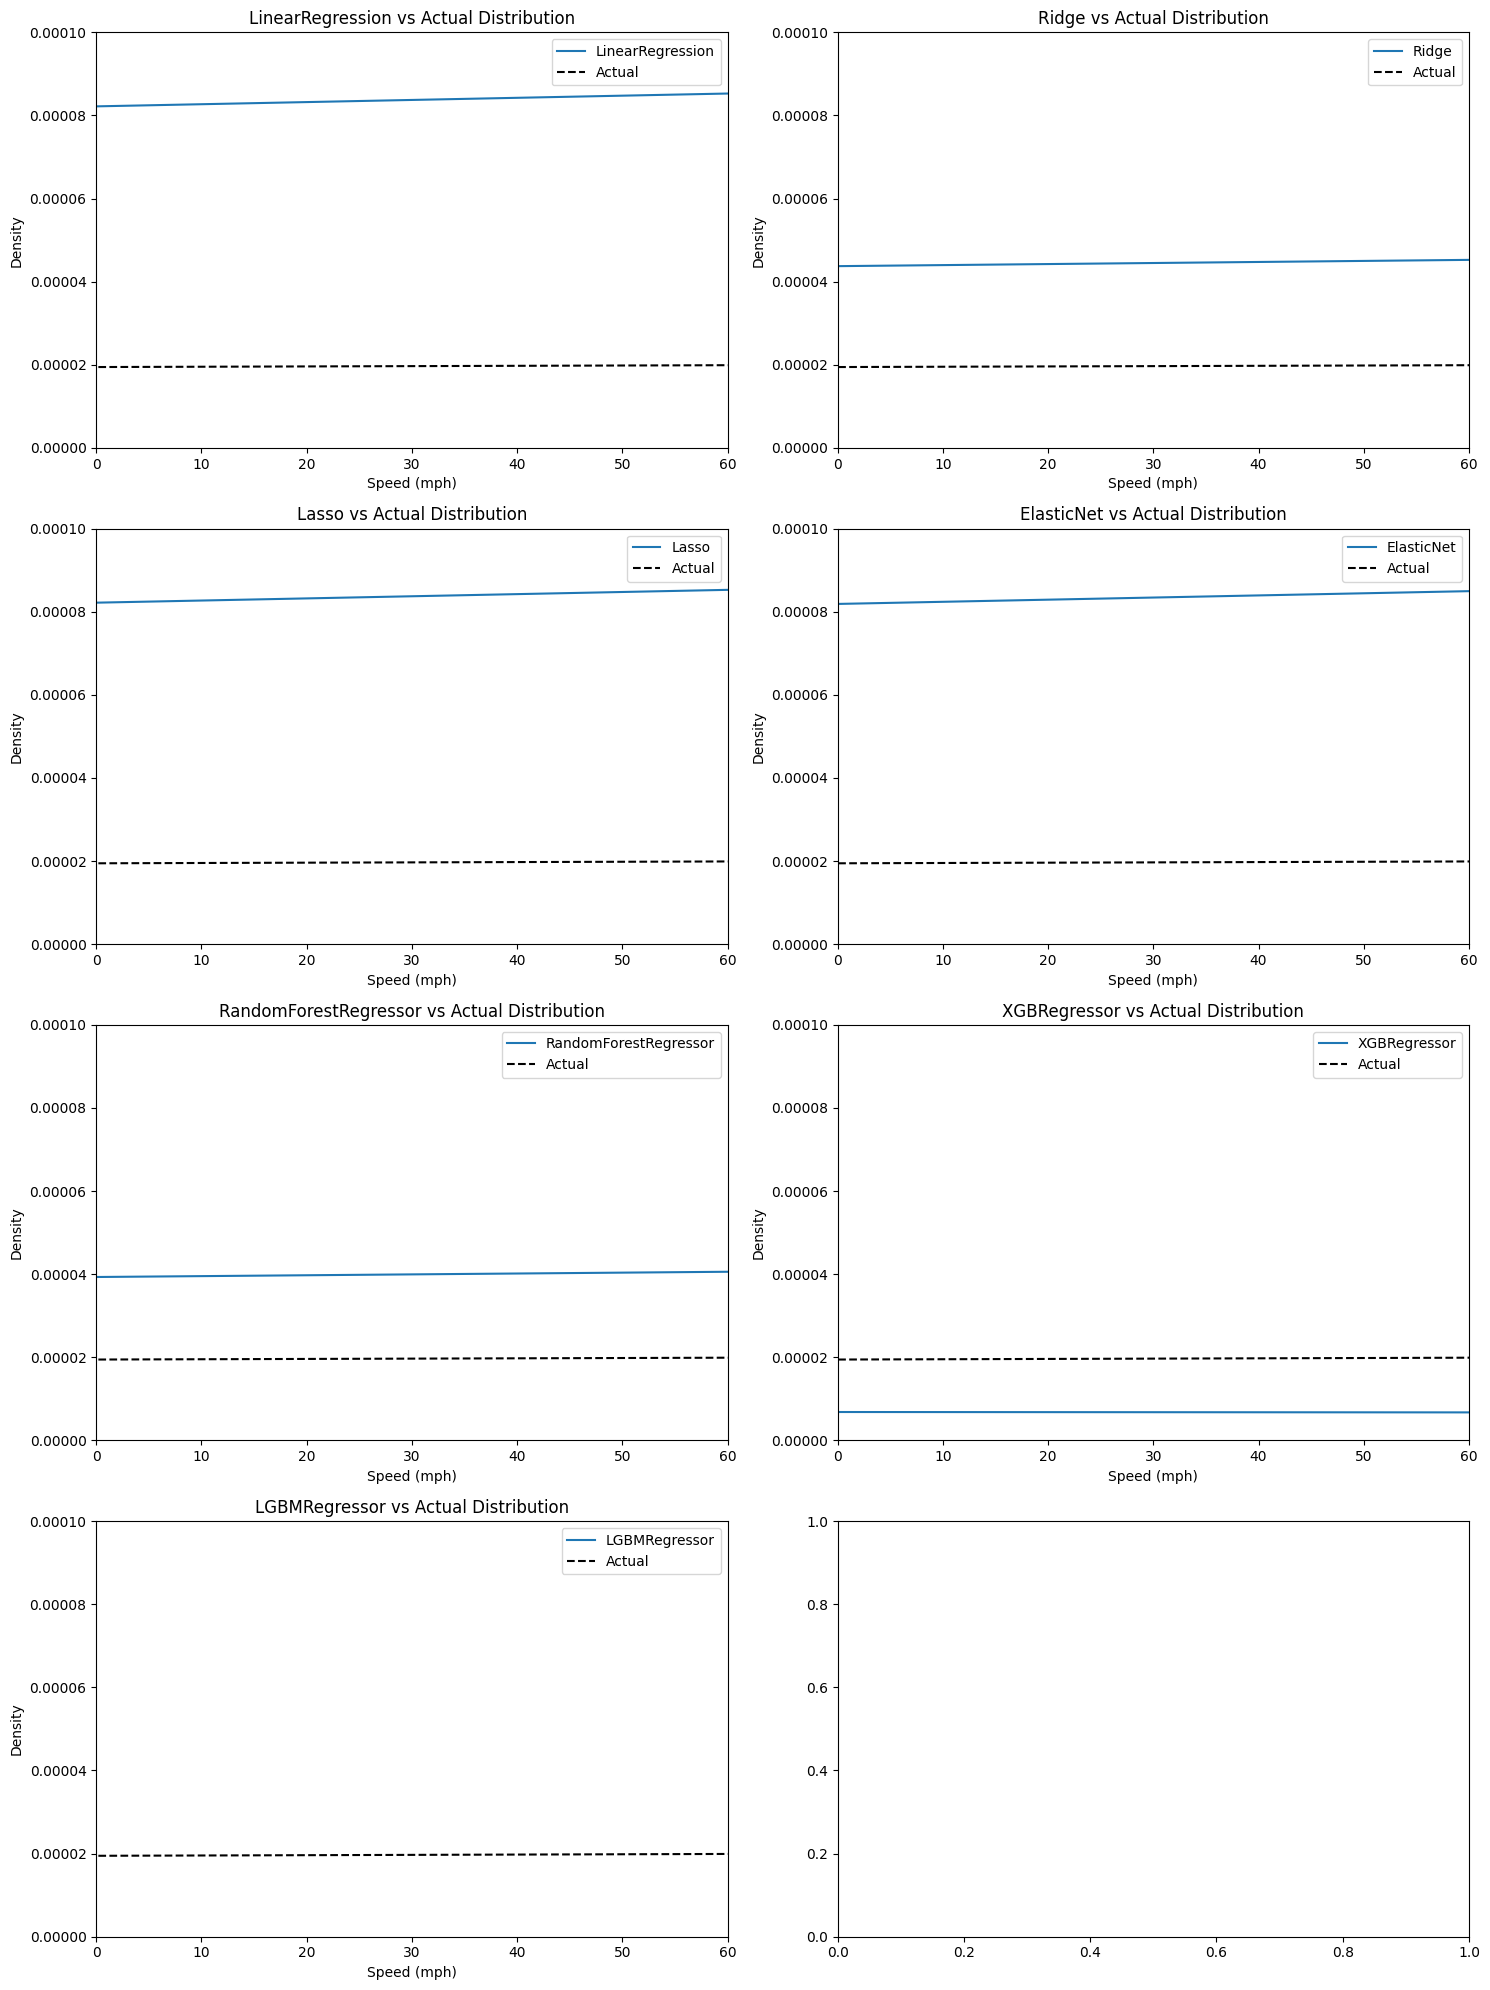

In [17]:
# Let's plot the predictions of different models
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(4, 2, figsize=(15, 20))  # 4x2 grid (adjust as needed)
axs = axs.ravel()

for i, (model_name, y_pred) in enumerate(model_predictions.items()):
    sns.kdeplot(y_pred, label=model_name, ax=axs[i])
    sns.kdeplot(y_train, label='Actual', color='black', linestyle='--', ax=axs[i])
    axs[i].set_xlim(0, 60)
    axs[i].set_ylim(0, 0.0001)
    axs[i].set_title(f'{model_name} vs Actual Distribution')
    axs[i].set_xlabel('Speed (mph)')
    axs[i].set_ylabel('Density')
    axs[i].legend()

plt.tight_layout()
plt.show()
